In [95]:
import os,sys
#sys.path.append(os.path.dirname(os.path.dirname(__file__)))
from dataset.mnist import load_mnist
from funcs import *
from collections import OrderedDict

# 重写了一遍神经网络，其实和以前写的一样，当作练习
class Network(object):
    def __init__(self, input_size, hide_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hide_size)
        self.params['b1'] = np.random.randn(hide_size)
        self.params['W2'] = weight_init_std * np.random.randn(hide_size, output_size)
        self.params['b2'] = np.random.randn(output_size)

        # 层
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'],self.params['b1'])
        self.layers['Sigmoid'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'],self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y,t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)
        
        return np.sum(y==t) / x.shape[0]
    
    def gradient(self, x, t):
        self.loss(x, t)

        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        grads={}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads

In [96]:
learning_rate = 0.03
iter_per_print = 100  # 每 1000 步记录一次数据并存入列表，并打印一次结果 -- loss 和 精度
iters_num = 3000

In [97]:
#--------------- SGD ----------------
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
net = Network(784, 50, 10)

train_size = x_train.shape[0]
batch_size = 100
iter_per_epoch = max(1, int(train_size/batch_size))

optimizer = SGD(learning_rate)

train_loss_list_SGD = []
train_acc_list_SGD = []
test_acc_list_SGD = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 初始 loss
    if i==0:
        loss = net.loss(x_train, t_train) 
        train_loss_list_SGD.append(loss)

    # 梯度
    grads = net.gradient(x_batch, t_batch)

    # 更新梯度
    optimizer.update(net.params, grads)


    if not i%iter_per_print:
    # if not (i+1) % iter_per_epoch:
        # 计算 loss
        loss = net.loss(x_train, t_train) 
        train_loss_list_SGD.append(loss)

        train_acc = net.accuracy(x_train, t_train)
        test_acc = net.accuracy(x_test, t_test)
        train_acc_list_SGD.append(train_acc)
        test_acc_list_SGD.append(test_acc)
        print('第%d次训练...' % (i+1))
        print('loss_function: %.8f. train_accuracy: %8f. test_accuracy: %.8f' % (loss, train_acc, test_acc))

第1次训练...
loss_function: 2.87165430. train_accuracy: 0.098633. test_accuracy: 0.09580000
第101次训练...
loss_function: 2.29294493. train_accuracy: 0.112450. test_accuracy: 0.11380000
第201次训练...
loss_function: 2.28197515. train_accuracy: 0.213367. test_accuracy: 0.21930000
第301次训练...
loss_function: 2.27036350. train_accuracy: 0.172717. test_accuracy: 0.16800000
第401次训练...
loss_function: 2.25390985. train_accuracy: 0.311317. test_accuracy: 0.32660000
第501次训练...
loss_function: 2.23109200. train_accuracy: 0.280033. test_accuracy: 0.29020000
第601次训练...
loss_function: 2.19474168. train_accuracy: 0.404767. test_accuracy: 0.41280000
第701次训练...
loss_function: 2.13730269. train_accuracy: 0.488533. test_accuracy: 0.49370000
第801次训练...
loss_function: 2.04923316. train_accuracy: 0.475833. test_accuracy: 0.47240000
第901次训练...
loss_function: 1.93505377. train_accuracy: 0.498350. test_accuracy: 0.49420000
第1001次训练...
loss_function: 1.80045255. train_accuracy: 0.482900. test_accuracy: 0.47690000
第1101次训练...

In [98]:
# --------------- Momentum ----------------
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
net = Network(784, 50, 10)

train_size = x_train.shape[0]
batch_size = 100
iter_per_epoch = max(1, int(train_size/batch_size))

optimizer = Momentum(momentum=0.9, lr=learning_rate)

train_loss_list_Mom = []
train_acc_list_Mom = []
test_acc_list_Mom = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 初始 loss
    if i==0:
        loss = net.loss(x_train, t_train) 
        train_loss_list_Mom.append(loss)

    # 梯度
    grads = net.gradient(x_batch, t_batch)

    # 更新梯度
    optimizer.update(net.params, grads)

    if not i%iter_per_print:
    # if not (i+1) % iter_per_epoch:
        # 计算 loss
        loss = net.loss(x_train, t_train) 
        train_loss_list_Mom.append(loss)

        train_acc = net.accuracy(x_train, t_train)
        test_acc = net.accuracy(x_test, t_test)
        train_acc_list_Mom.append(train_acc)
        test_acc_list_Mom.append(test_acc)
        print('第%d次训练...' % (i+1))
        print('loss_function: %.8f. train_accuracy: %8f. test_accuracy: %.8f' % (loss, train_acc, test_acc))

第1次训练...
loss_function: 2.68373262. train_accuracy: 0.099300. test_accuracy: 0.10320000
第101次训练...
loss_function: 1.98780685. train_accuracy: 0.315433. test_accuracy: 0.32320000
第201次训练...
loss_function: 1.18561911. train_accuracy: 0.680050. test_accuracy: 0.68420000
第301次训练...
loss_function: 0.73926045. train_accuracy: 0.811467. test_accuracy: 0.81410000
第401次训练...
loss_function: 0.54711410. train_accuracy: 0.854850. test_accuracy: 0.85870000
第501次训练...
loss_function: 0.45143839. train_accuracy: 0.882133. test_accuracy: 0.88470000
第601次训练...
loss_function: 0.39784012. train_accuracy: 0.892683. test_accuracy: 0.89460000
第701次训练...
loss_function: 0.36625858. train_accuracy: 0.898417. test_accuracy: 0.90240000
第801次训练...
loss_function: 0.34553066. train_accuracy: 0.902700. test_accuracy: 0.90430000
第901次训练...
loss_function: 0.32872386. train_accuracy: 0.906833. test_accuracy: 0.90950000
第1001次训练...
loss_function: 0.31508012. train_accuracy: 0.909750. test_accuracy: 0.91020000
第1101次训练...

In [99]:
class AdaGrad(object):
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None 
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= ( self.lr * grads[key] ) / (np.sqrt(self.h[key]) + 1e-7) # 1e-7是为了防止溢出

# --------------- Adagrad ----------------
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
net = Network(784, 50, 10)

train_size = x_train.shape[0]
batch_size = 100
iter_per_epoch = max(1, int(train_size/batch_size))

optimizer = AdaGrad(learning_rate)

train_loss_list_Adagrad = []
train_acc_list_Adagrad = []
test_acc_list_Adagrad = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 初始 loss
    if i==0:
        loss = net.loss(x_train, t_train) 
        train_loss_list_Adagrad.append(loss)

    # 梯度
    grads = net.gradient(x_batch, t_batch)

    # 更新梯度
    optimizer.update(net.params, grads)

    if not i%iter_per_print:
    # if not (i+1) % iter_per_epoch:
        # 计算 loss
        loss = net.loss(x_train, t_train) 
        train_loss_list_Adagrad.append(loss)

        train_acc = net.accuracy(x_train, t_train)
        test_acc = net.accuracy(x_test, t_test)
        train_acc_list_Adagrad.append(train_acc)
        test_acc_list_Adagrad.append(test_acc)
        print('第%d次训练...' % (i+1))
        print('loss_function: %.8f. train_accuracy: %8f. test_accuracy: %.8f' % (loss, train_acc, test_acc))

第1次训练...
loss_function: 2.56546310. train_accuracy: 0.099300. test_accuracy: 0.10320000
第101次训练...
loss_function: 0.51900953. train_accuracy: 0.883267. test_accuracy: 0.88550000
第201次训练...
loss_function: 0.38826978. train_accuracy: 0.904067. test_accuracy: 0.90530000
第301次训练...
loss_function: 0.33916606. train_accuracy: 0.911283. test_accuracy: 0.91260000
第401次训练...
loss_function: 0.30894516. train_accuracy: 0.916817. test_accuracy: 0.91740000
第501次训练...
loss_function: 0.29093644. train_accuracy: 0.920517. test_accuracy: 0.92080000
第601次训练...
loss_function: 0.27579426. train_accuracy: 0.924033. test_accuracy: 0.92490000
第701次训练...
loss_function: 0.26521347. train_accuracy: 0.927033. test_accuracy: 0.92610000
第801次训练...
loss_function: 0.25441502. train_accuracy: 0.929483. test_accuracy: 0.92880000
第901次训练...
loss_function: 0.24762882. train_accuracy: 0.931100. test_accuracy: 0.93030000
第1001次训练...
loss_function: 0.24052018. train_accuracy: 0.933017. test_accuracy: 0.93170000
第1101次训练...

In [107]:
# --------------- Adam ----------------
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
net = Network(784, 50, 10)

train_size = x_train.shape[0]
batch_size = 100
iter_per_epoch = max(1, int(train_size/batch_size))


optimizer = Adam(0.0003) # 单独设置 Adam 的学习率

train_loss_list_Adam = []
train_acc_list_Adam = []
test_acc_list_Adam = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 初始 loss
    if i==0:
        loss = net.loss(x_train, t_train) 
        train_loss_list_Adam.append(loss)

    # 梯度
    grads = net.gradient(x_batch, t_batch)

    # 更新梯度
    optimizer.update(net.params, grads)

    if not i%iter_per_print:
    # if not (i+1) % iter_per_epoch:
        # 计算 loss
        loss = net.loss(x_train, t_train) 
        train_loss_list_Adam.append(loss)

        train_acc = net.accuracy(x_train, t_train)
        test_acc = net.accuracy(x_test, t_test)
        train_acc_list_Adam.append(train_acc)
        test_acc_list_Adam.append(test_acc)
        print('第%d次训练...' % (i+1))
        print('loss_function: %.8f. train_accuracy: %8f. test_accuracy: %.8f' % (loss, train_acc, test_acc))

第1次训练...
loss_function: 2.43059144. train_accuracy: 0.102183. test_accuracy: 0.10100000
第101次训练...
loss_function: 0.45185335. train_accuracy: 0.892267. test_accuracy: 0.89450000
第201次训练...
loss_function: 0.35812834. train_accuracy: 0.908083. test_accuracy: 0.91180000
第301次训练...
loss_function: 0.32405622. train_accuracy: 0.916700. test_accuracy: 0.91720000
第401次训练...
loss_function: 0.30078847. train_accuracy: 0.920000. test_accuracy: 0.92220000
第501次训练...
loss_function: 0.28564185. train_accuracy: 0.923800. test_accuracy: 0.92300000
第601次训练...
loss_function: 0.27549947. train_accuracy: 0.925300. test_accuracy: 0.92580000
第701次训练...
loss_function: 0.26574474. train_accuracy: 0.927983. test_accuracy: 0.92820000
第801次训练...
loss_function: 0.25889881. train_accuracy: 0.929650. test_accuracy: 0.92800000
第901次训练...
loss_function: 0.25242641. train_accuracy: 0.931117. test_accuracy: 0.92930000
第1001次训练...
loss_function: 0.24795193. train_accuracy: 0.931633. test_accuracy: 0.92980000
第1101次训练...

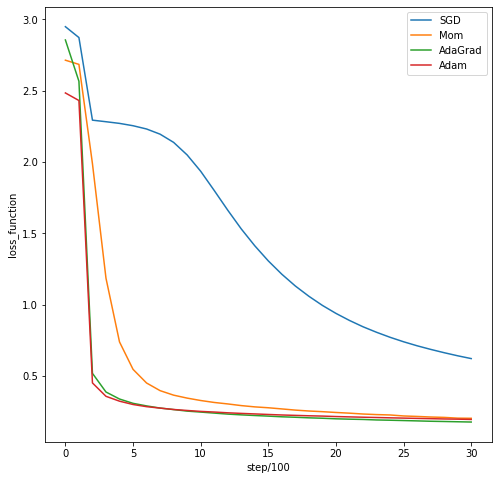

In [113]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 绘图配置
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

# x-axis 坐标
x = range(len(train_loss_list_SGD))

# 绘图
ax.plot(x, train_loss_list_SGD, label='SGD')
ax.plot(x, train_loss_list_Mom, label='Mom')
ax.plot(x, train_loss_list_Adagrad, label='AdaGrad')
ax.plot(x, train_loss_list_Adam, label='Adam')
ax.set_xlabel('step/100')
ax.set_ylabel('loss_function')
ax.legend(loc='upper right')